# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
# Importing libraries for investigating the dataset
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
tic_tac=pd.read_csv('tic-tac-toe.csv')

In [3]:
tic_tac.shape

(958, 10)

In [4]:
tic_tac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB


In [5]:
tic_tac.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [6]:
tic_tac.sample(5)

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
398,o,o,x,b,x,b,x,x,o,True
2,x,x,x,x,o,o,o,o,x,True
303,o,x,x,o,x,b,x,o,b,True
312,o,x,x,b,x,o,b,x,o,True
24,x,x,x,o,o,x,o,b,b,True


In [7]:
tic_tac.value_counts()

TL  TM  TR  ML  MM  MR  BL  BM  BR  class
x   x   x   x   o   o   x   o   o   True     1
b   b   b   b   o   o   x   x   x   True     1
            o   b   o   x   x   x   True     1
                o   b   x   x   x   True     1
            x   x   x   b   o   o   True     1
                                            ..
        o   x   x   o   b   x   o   False    1
                o   x   o   x   b   False    1
                            b   x   False    1
                    o   x   x   x   True     1
                    b   o   x   x   False    1
Name: count, Length: 958, dtype: int64

In [8]:
tic_tac.nunique()

,0
TL,3
TM,3
TR,3
ML,3
MM,3
MR,3
BL,3
BM,3
BR,3
class,2


In [9]:
tic_tac.isnull().sum()

,0
TL,0
TM,0
TR,0
ML,0
MM,0
MR,0
BL,0
BM,0
BR,0
class,0


In [10]:
# Next b (no value), x and o will be converted to 0, 1, 2 accordingly to allow model building with deep learning
# Replace and convert only the 9 feature columns
columns_to_convert = tic_tac.columns[:9]  # First 9 columns
tic_tac[columns_to_convert] = tic_tac[columns_to_convert].replace({'b': 0, 'x': 1, 'o': 2}).astype(int)



/tmp/ipython-input-1047350739.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tic_tac[columns_to_convert] = tic_tac[columns_to_convert].replace({'b': 0, 'x': 1, 'o': 2}).astype(int)


In [11]:
tic_tac.dtypes

,0
TL,int64
TM,int64
TR,int64
ML,int64
MM,int64
MR,int64
BL,int64
BM,int64
BR,int64
class,bool


In [12]:
# Converting the last column to integers (0 for False and 1 for True)
tic_tac['class'] = tic_tac['class'].astype(int)

# Re-checking that all the columns are converted
tic_tac.dtypes

,0
TL,int64
TM,int64
TR,int64
ML,int64
MM,int64
MR,int64
BL,int64
BM,int64
BR,int64
class,int64


In [13]:
from sklearn.preprocessing import MinMaxScaler

# Separate inputs and output
X = tic_tac.iloc[:, :9]  # First 9 columns (board positions)
y = tic_tac.iloc[:, -1]  # Last column (target)

# Normalize the input data to range [0, 1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [63]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten
from tensorflow.keras.optimizers import RMSprop

In [64]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized,
    y,
    stratify=y,
    test_size=0.2,
    random_state=42
)


In [65]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input


##### Build the model

model = Sequential()
model.add(Input(shape=(9,)))  #  define the input shape, 9 input features
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))



model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 194 (776.00 B)

 Trainable params: 194 (776.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Train the model
batch_size = 32
epochs = 50

958/32

29.9375

In [67]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.4417 - loss: 0.7629 - val_accuracy: 0.6354 - val_loss: 0.6579
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5822 - loss: 0.6918 - val_accuracy: 0.6562 - val_loss: 0.6440
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5907 - loss: 0.7104 - val_accuracy: 0.6615 - val_loss: 0.6367
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6047 - loss: 0.6656 - val_accuracy: 0.6719 - val_loss: 0.6300
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5998 - loss: 0.6990 - val_accuracy: 0.6823 - val_loss: 0.6249
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6079 - loss: 0.6802 - val_accuracy: 0.6615 - val_loss: 0.6202
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6491 - loss: 0.6581 - val_accuracy: 0.6615 - val_loss: 0.6159
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6629 - loss: 0.6392 - val_accuracy: 0.6510 - val_loss

The model composed of 1 layer of 16 neurons achieved in the training 70.57% accuracy with loss of 0.5581 (large loss).

In [68]:
# Evaluation of the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5485568046569824
Test accuracy: 0.7083333134651184


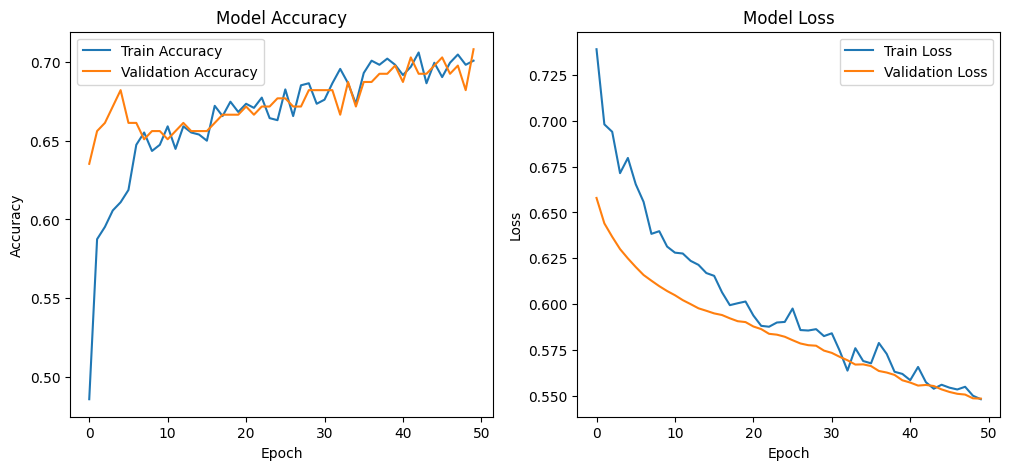

In [69]:


# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [21]:
model.save('tic-tac-toe.model.keras')


## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [70]:
from keras.models import load_model

loaded_model = load_model('tic-tac-toe.model.keras')

# Now you can use it for predictions
predictions = loaded_model.predict(X_test)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


In [71]:
type(X_test)

numpy.ndarray

In [72]:
type(y_test)

pandas.core.series.Series

In [73]:
# Select a few random rows from the test set
num_samples = 5
random_indices = np.random.choice(len(X_test), size=num_samples, replace=False)

# Use .iloc[] for DataFrame and Series
X_random = X_test[random_indices]  # Convert to NumPy array
y_true = y_test.iloc[random_indices].values     # Convert to NumPy array

# Make predictions
predictions = loaded_model.predict(X_random)
predicted_classes = np.argmax(predictions, axis=1)

# Display results
print("Predictions vs Actual:")
print("-" * 50)
for i in range(num_samples):
    print(f"Sample {i+1}:")
    print(f"  Predicted: {predicted_classes[i]}")
    print(f"  Actual: {y_true[i]}")
    print(f"  Correct: {predicted_classes[i] == y_true[i]}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Predictions vs Actual:
--------------------------------------------------
Sample 1:
  Predicted: 1
  Actual: 1
  Correct: True

Sample 2:
  Predicted: 0
  Actual: 1
  Correct: False

Sample 3:
  Predicted: 1
  Actual: 0
  Correct: False

Sample 4:
  Predicted: 1
  Actual: 1
  Correct: True

Sample 5:
  Predicted: 0
  Actual: 0
  Correct: True



## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [74]:
# The model is still not optimal, therefore I will try to improve it, first by adding an additionaly layer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

# Build NEW model with additional layer
model = Sequential()
model.add(Input(shape=(9,)))
model.add(Dense(16, activation='relu'))   # First hidden layer
model.add(Dense(16, activation='relu'))   # NEW additional layer
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train from scratch
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_test, y_test),
)



Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6452 - loss: 0.6670 - val_accuracy: 0.6510 - val_loss: 0.6442
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6763 - loss: 0.6383 - val_accuracy: 0.6510 - val_loss: 0.6380
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6382 - loss: 0.6573 - val_accuracy: 0.6510 - val_loss: 0.6321
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6604 - loss: 0.6383 - val_accuracy: 0.6510 - val_loss: 0.6278
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6647 - loss: 0.6221 - val_accuracy: 0.6510 - val_loss: 0.6220
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6379 - loss: 0.6369 - val_accuracy: 0.6510 - val_loss: 0.6175
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6524 - loss: 0.6215 - val_accuracy: 0.6510 - val_loss: 0.6138
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6337 - loss: 0.6356 - val_accuracy: 0.6510 - val_loss

In [75]:
# Evaluation of the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4584495723247528
Test accuracy: 0.734375


The model improved from 70 to 73%, which is not sufficien. In the next step I will add more epochs.


In [76]:
# I will try to improve the model further by adding epochs

# Train from scratch
history_epochs1 = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_test, y_test),
)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7988 - loss: 0.4092 - val_accuracy: 0.7448 - val_loss: 0.4524
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8215 - loss: 0.3979 - val_accuracy: 0.7500 - val_loss: 0.4521
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8177 - loss: 0.3915 - val_accuracy: 0.7396 - val_loss: 0.4497
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8042 - loss: 0.3912 - val_accuracy: 0.7604 - val_loss: 0.4461
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8091 - loss: 0.3996 - val_accuracy: 0.7448 - val_loss: 0.4511
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8267 - loss: 0.3963 - val_accuracy: 0.7500 - val_loss: 0.4466
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8257 - loss: 0.3860 - val_accuracy: 0.7812 - val_loss: 0.4416
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8192 - loss: 0.4028 - val_accuracy: 0.7500 - v

In [77]:
# Evaluation of the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3761261999607086
Test accuracy: 0.8333333134651184


Adding epochs significantly improved the accuracy (from 0.734 to 0.833).

In [78]:
# Build NEW model with dropout
model_drop = Sequential()
model_drop.add(Input(shape=(9,)))
model_drop.add(Dense(16, activation='relu'))   # First hidden layer
model_drop.add(Dropout(0.2))  # Randomly drop 20% of connections
model_drop.add(Dense(16, activation='relu'))   # NEW additional layer
model_drop.add(Dropout(0.2))  # Randomly drop 20% of connections
model_drop.add(Dense(2, activation='softmax'))

model_drop.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train from scratch
history_drop = model_drop.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_test, y_test),
)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.5096 - loss: 0.7546 - val_accuracy: 0.5990 - val_loss: 0.6613
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6258 - loss: 0.6706 - val_accuracy: 0.6510 - val_loss: 0.6557
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6246 - loss: 0.6649 - val_accuracy: 0.6458 - val_loss: 0.6527
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6450 - loss: 0.6385 - val_accuracy: 0.6406 - val_loss: 0.6483
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6293 - loss: 0.6431 - val_accuracy: 0.6302 - val_loss: 0.6446
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6200 - loss: 0.6630 - val_accuracy: 0.6406 - val_loss: 0.6418
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6753 - loss: 0.6154 - val_accuracy: 0.6458 - val_loss: 0.6403
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6304 - loss: 0.6452 - val_accuracy: 0.6406 - 

In [79]:
# Evaluation of the model
score = model_drop.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4789208471775055
Test accuracy: 0.7135416865348816


Dropout 0.2 reduced the model accuracy, I will therefore reduce it to 0.1.

I will now add additional neurons to both layers to improve the model further.

In [82]:
# Build NEW model with more neurons
model_neurons = Sequential()
model_neurons.add(Input(shape=(9,)))
model_neurons.add(Dense(32, activation='relu'))   # First hidden layer
model_neurons.add(Dropout (0.1))
model_neurons.add(Dense(32, activation='relu'))   # NEW additional layer
model_neurons.add(Dropout (0.1))
model_neurons.add(Dense(2, activation='softmax'))

model_neurons.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train from scratch
history_neurons = model_neurons.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_test, y_test),
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.6229 - loss: 0.6624 - val_accuracy: 0.6510 - val_loss: 0.6512
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6762 - loss: 0.6360 - val_accuracy: 0.6510 - val_loss: 0.6453
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6385 - loss: 0.6459 - val_accuracy: 0.6510 - val_loss: 0.6402
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6674 - loss: 0.6269 - val_accuracy: 0.6510 - val_loss: 0.6371
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6240 - loss: 0.6291 - val_accuracy: 0.6562 - val_loss: 0.6329
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6373 - loss: 0.6296 - val_accuracy: 0.6458 - val_loss: 0.6285
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6331 - loss: 0.6259 - val_accuracy: 0.6562 - val_loss: 0.6253
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6786 - loss: 0.6087 - val_accuracy: 0.6510 - 

In [83]:
# Evaluation of the model
score = model_neurons.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3691449463367462
Test accuracy: 0.8489583134651184


The model improved slightly (to 0.849) with the addition of more neurons and reducing the dropout to 0.1.

In [84]:
# Try a smaller learning rate for more precise learning (the default is 0.001)
model_neurons.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train from scratch
history_neurons = model_neurons.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_test, y_test),
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9050 - loss: 0.2602 - val_accuracy: 0.8542 - val_loss: 0.3698
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8560 - loss: 0.2890 - val_accuracy: 0.8490 - val_loss: 0.3695
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8565 - loss: 0.3173 - val_accuracy: 0.8385 - val_loss: 0.3729
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8711 - loss: 0.2944 - val_accuracy: 0.8438 - val_loss: 0.3674
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8641 - loss: 0.2849 - val_accuracy: 0.8385 - val_loss: 0.3711
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8796 - loss: 0.2857 - val_accuracy: 0.8646 - val_loss: 0.3666
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8604 - loss: 0.2812 - val_accuracy: 0.8490 - val_loss: 0.3761
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8708 - loss: 0.2744 - val_accuracy: 0.8385 - 

In [85]:
# Evaluation of the model
score = model_neurons.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.33241555094718933
Test accuracy: 0.8489583134651184


Decreasing learning rate did not change much. The model improved from initial 70% to 84.9%, but it could still be improved further. I will try now and increase learning rate.

In [86]:
model_neurons.compile(optimizer=Adam(learning_rate=0.005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train from scratch
history_neurons = model_neurons.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_test, y_test),
)

# Evaluation of the model
score = model_neurons.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.8742 - loss: 0.3068 - val_accuracy: 0.8385 - val_loss: 0.3424
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8604 - loss: 0.2674 - val_accuracy: 0.8438 - val_loss: 0.3529
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8823 - loss: 0.2501 - val_accuracy: 0.8698 - val_loss: 0.3312
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8675 - loss: 0.2734 - val_accuracy: 0.8542 - val_loss: 0.3154
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9015 - loss: 0.2402 - val_accuracy: 0.8490 - val_loss: 0.3313
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8921 - loss: 0.2395 - val_accuracy: 0.8750 - val_loss: 0.3085
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8706 - loss: 0.2765 - val_accuracy: 0.8438 - val_loss: 0.4321
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8874 - loss: 0.2538 - val_accuracy: 0.8490 - 

The model accuracy increased to 0.896 with increase in the learning rate.

In [87]:
# Adding an additional layer to further improve model efficiency (pyramid structure is usually recommended)
model_3layers = Sequential()
model_3layers.add(Input(shape=(9,)))

model_3layers.add(Dense(32, activation='relu'))
model_3layers.add(Dropout(0.1))
model_3layers.add(Dense(32, activation='relu'))
model_3layers.add(Dropout(0.1))
model_3layers.add(Dense(16, activation='relu'))   # Taper down
model_3layers.add(Dropout(0.1))
model_3layers.add(Dense(2, activation='softmax'))

model_3layers.compile(optimizer=Adam(learning_rate=0.005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train from scratch
history_layers = model_3layers.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_test, y_test),
)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.5812 - loss: 0.6784 - val_accuracy: 0.6510 - val_loss: 0.6304
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6554 - loss: 0.6286 - val_accuracy: 0.6562 - val_loss: 0.6259
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6651 - loss: 0.6044 - val_accuracy: 0.6927 - val_loss: 0.5988
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6866 - loss: 0.5851 - val_accuracy: 0.6771 - val_loss: 0.5780
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7200 - loss: 0.5246 - val_accuracy: 0.6927 - val_loss: 0.5281
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6770 - loss: 0.5417 - val_accuracy: 0.7448 - val_loss: 0.4951
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7296 - loss: 0.5003 - val_accuracy: 0.7135 - val_loss: 0.5375
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7699 - loss: 0.4606 - val_accuracy: 0.7552 - 

In [88]:
# Evaluation of the model
score = model_3layers.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3504945933818817
Test accuracy: 0.8385416865348816


The previous model (2 layers, 32 neurons each) achieved 89.6% accuracy. Adding a third layer dropped it to 83.9%. This suggests:​

The 2-layer model was already capturing the patterns well

The extra layer added unnecessary complexity for this simple tic-tac-toe problem​

More parameters = more chance of overfitting on this small dataset (958 samples)

In [95]:
# Next to improve the model further, to 2 layers, the first layer will be increased
model_large = Sequential()
model_large.add(Input(shape=(9,)))

model_large.add(Dense(128, activation='relu'))
model_large.add(Dropout(0.1))
model_large.add(Dense(32, activation='relu'))
model_large.add(Dropout(0.1))
model_large.add(Dense(2, activation='softmax'))

model_large.compile(optimizer=Adam(learning_rate=0.005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train from scratch
history_large = model_large.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_test, y_test),
)



Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.5880 - loss: 0.6796 - val_accuracy: 0.6823 - val_loss: 0.6287
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6658 - loss: 0.6129 - val_accuracy: 0.6615 - val_loss: 0.5900
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6905 - loss: 0.5488 - val_accuracy: 0.7188 - val_loss: 0.5703
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7057 - loss: 0.5470 - val_accuracy: 0.7604 - val_loss: 0.5056
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7636 - loss: 0.4895 - val_accuracy: 0.7604 - val_loss: 0.5006
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7562 - loss: 0.4599 - val_accuracy: 0.7344 - val_loss: 0.5160
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7693 - loss: 0.4231 - val_accuracy: 0.7604 - val_loss: 0.4742
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7746 - loss: 0.4417 - val_accuracy: 0.7396 - 

In [96]:
# Evaluation of the model
score = model_large.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2039669007062912
Test accuracy: 0.9114583134651184


The model improved to 91.14% accuracy

In [97]:
# Decreasing batch size and number of epochs to achieve better model performance

history = model_large.fit(
    X_train, y_train,
    batch_size=8,  # NEW: smaller batch
    epochs=200,     # More epochs
    validation_data=(X_test, y_test)
)


Epoch 1/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9006 - loss: 0.3229 - val_accuracy: 0.6979 - val_loss: 0.5095
Epoch 2/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7913 - loss: 0.3804 - val_accuracy: 0.8125 - val_loss: 0.3540
Epoch 3/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8637 - loss: 0.2890 - val_accuracy: 0.9010 - val_loss: 0.3347
Epoch 4/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9122 - loss: 0.1875 - val_accuracy: 0.8958 - val_loss: 0.2947
Epoch 5/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9183 - loss: 0.2034 - val_accuracy: 0.9010 - val_loss: 0.2075
Epoch 6/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9313 - loss: 0.1709 - val_accuracy: 0.9062 - val_loss: 0.2461
Epoch 7/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9367 - loss: 0.1464 - val_accuracy: 0.9010 - val_loss: 0.2386
Epoch 8/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9637 - loss: 0.1010 - val_accuracy: 0.9010 - 

In [98]:
# Evaluation of the model
score = model_large.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14923900365829468
Test accuracy: 0.9427083134651184


The model improved further to 0.943, the loss decreased to 0.15.

In [99]:
history2 = model_large.fit(
    X_train, y_train,
    batch_size=16,  # NEW: smaller batch
    epochs=200,     # More epochs
    validation_data=(X_test, y_test)
)

Epoch 1/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9872 - loss: 0.0437 - val_accuracy: 0.9323 - val_loss: 0.1083
Epoch 2/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0252 - val_accuracy: 0.9427 - val_loss: 0.1234
Epoch 3/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9970 - loss: 0.0151 - val_accuracy: 0.9479 - val_loss: 0.1283
Epoch 4/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9856 - loss: 0.0344 - val_accuracy: 0.9271 - val_loss: 0.1246
Epoch 5/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9918 - loss: 0.0397 - val_accuracy: 0.9427 - val_loss: 0.1431
Epoch 6/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9912 - loss: 0.0191 - val_accuracy: 0.9427 - val_loss: 0.1270
Epoch 7/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9982 - loss: 0.0158 - val_accuracy: 0.9427 - val_loss: 0.1253
Epoch 8/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9914 - loss: 0.0271 - val_accuracy: 0.9375 - 

In [100]:
# Evaluation of the model
score = model_large.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23267455399036407
Test accuracy: 0.9375


Batch size=8 achieved better results than batch size=32 and 16. Therefore, I'll continue with this hyperparameter and will change epochs' number further.

In [102]:
history = model_large.fit(
    X_train, y_train,
    batch_size=8,  # NEW: smaller batch
    epochs=500,     # More epochs
    validation_data=(X_test, y_test)
)

# Evaluation of the model
score = model_large.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9908 - loss: 0.0645 - val_accuracy: 0.9583 - val_loss: 0.1220
Epoch 2/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9886 - loss: 0.0285 - val_accuracy: 0.9635 - val_loss: 0.1701
Epoch 3/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9989 - loss: 0.0116 - val_accuracy: 0.9531 - val_loss: 0.1613
Epoch 4/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9922 - loss: 0.0242 - val_accuracy: 0.9479 - val_loss: 0.0975
Epoch 5/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9924 - loss: 0.0153 - val_accuracy: 0.9427 - val_loss: 0.1277
Epoch 6/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9905 - loss: 0.0173 - val_accuracy: 0.9479 - val_loss: 0.1715
Epoch 7/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0266 - val_accuracy: 0.9427 - val_loss: 0.1484
Epoch 8/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9903 - loss: 0.0197 - val_accuracy: 0.9427 - v

Adding more epochs further improved the model accuracy to 96.9% and decreased test loss to 0.09.

**Which approach(es) did you find helpful to improve your model performance?**

The largest contribution (more than 15% increase to model's accuracy) to the model performance was done by increasing epochs' number.